In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [45]:
file_path = r"C:\Users\Test\Downloads\GOOG.csv"

df = pd.read_csv(file_path)

# Fix the header issue (set the first row as column headers)
df.columns = df.iloc[0]  # Assign the first row to column names
df = df[1:]  # Drop the first row


# Rename columns for better clarity
df.columns = ['Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert columns to appropriate data types
numeric_columns = ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
df = df.dropna()  # Drop rows with missing values

# Drop duplicate rows (if any)
df = df.drop_duplicates()

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the cleaned data
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2024-01-02,139.218109,139.559998,140.615005,137.740005,139.600006,20071900
1,2024-01-03,140.016144,140.360001,141.089996,138.429993,138.600006,18974300
2,2024-01-04,137.701828,138.039993,140.634995,138.009995,139.850006,18253300
3,2024-01-05,137.053421,137.389999,138.809998,136.850006,138.352005,15433200
4,2024-01-08,140.185715,140.529999,140.639999,137.880005,138.000000,17645300


In [47]:
# output_file_path =  "C:/Users/Test/Downloads/GOOG_Updated_2.csv"
# df.to_csv(output_file_path, index= False)

In [49]:
# Stock Price Analyzer
 
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

In [51]:
#Calculate Moving Average
df['20_MA'] = df['Adj_Close'].rolling(window= 20).mean()
df['50_MA'] = df['Adj_Close'].rolling(window= 50).mean()

#Calculate daily returns
df['Daily_Return']= df['Adj_Close'].pct_change()

#Calculate volatility (20-day rolling standard deviation of daily returns)
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

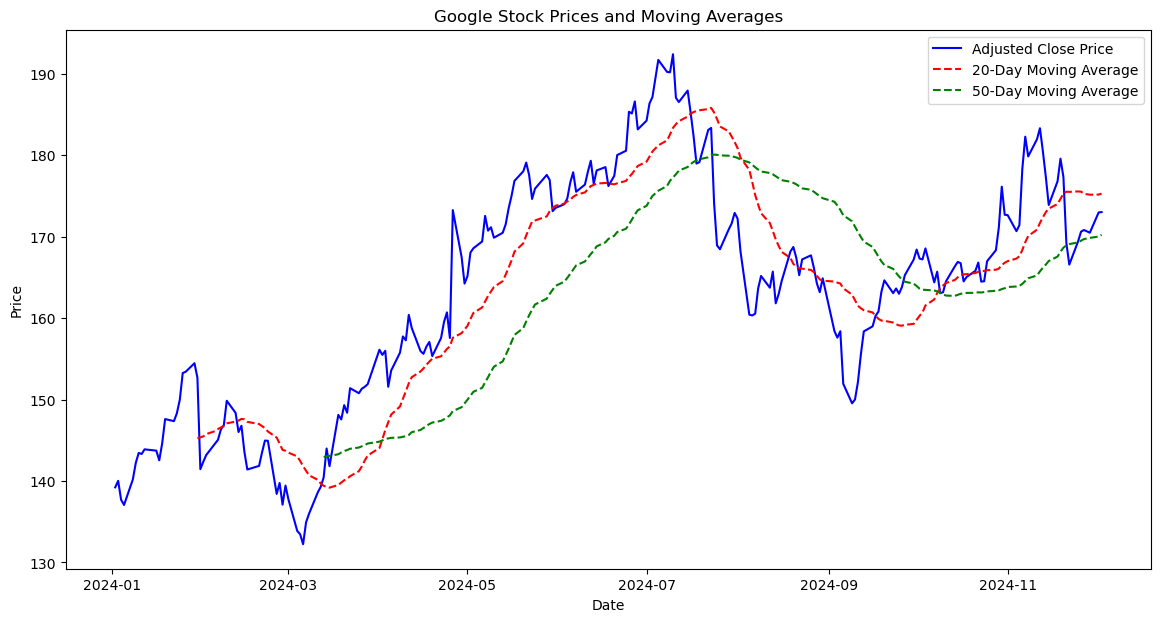

In [53]:
# Visualization 1: Stock Prices and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj_Close'], label='Adjusted Close Price', color='blue')
plt.plot(df.index, df['20_MA'], label='20-Day Moving Average', color='red', linestyle='--')
plt.plot(df.index, df['50_MA'], label='50-Day Moving Average', color='green', linestyle='--')
plt.title('Google Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

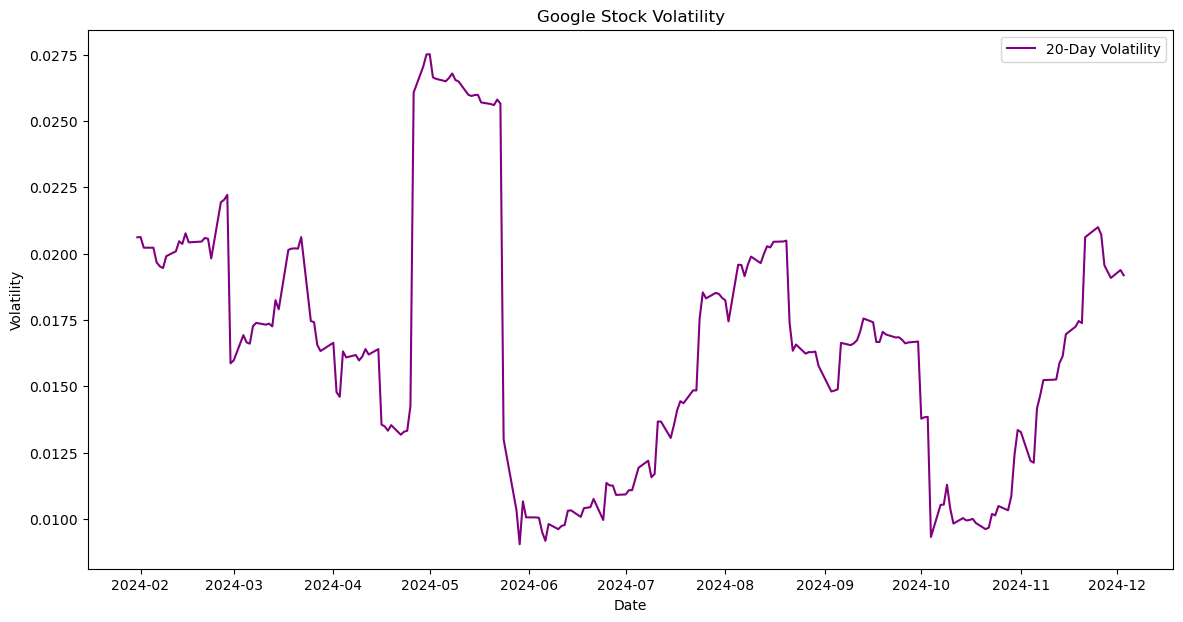

In [55]:
# Visualization 2: Volatility Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility'], label='20-Day Volatility', color='purple')
plt.title('Google Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

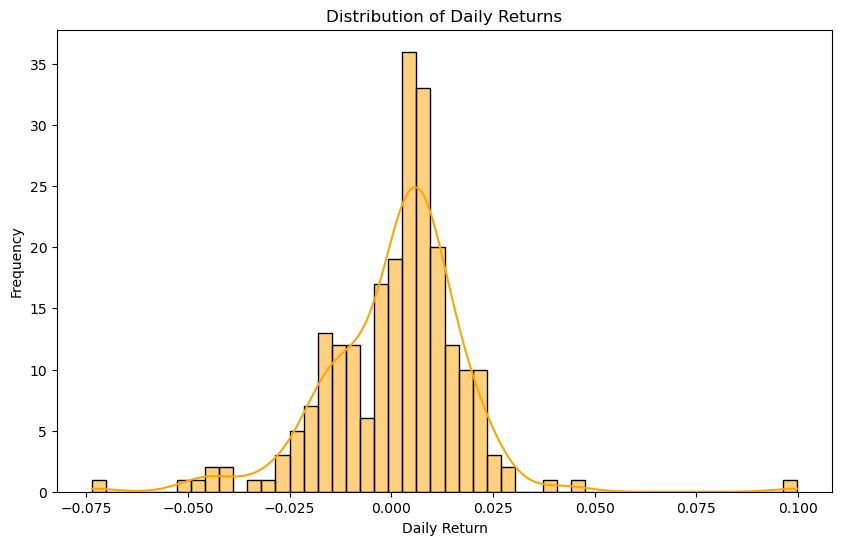

In [57]:
# Visualization 3: Distribution of Daily Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True, color='orange')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()